In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/tracks2.csv')

In [3]:
df.dropna(axis=0, how='any', inplace=True)
removed_cols = ['Unnamed: 0', 'type', 'uri', 'track_href', 'analysis_url', 'id']
df = df.drop(columns=removed_cols)

song_counts = df['name'].value_counts()
duplicate_songs = song_counts[song_counts > 1].index

track_df = df[~df['name'].isin(duplicate_songs)]
track_df = track_df.set_index('name')

In [4]:
def adjust_time(time):
    return time/1000

track_df['duration_ms'] = track_df['duration_ms'].apply(adjust_time)
track_df = track_df.rename(columns={'duration_ms': 'duration_s'})

In [5]:
mood_distribution = track_df.groupby('mood').describe()
mood_distribution

danceability                                                      \
                 count      mean       std     min      25%    50%     75%   
mood                                                                         
angry           3003.0  0.519107  0.179972  0.0423  0.38900  0.516  0.6435   
calm            4364.0  0.482074  0.227563  0.0000  0.27275  0.513  0.6710   
energetic       2599.0  0.637516  0.164218  0.0718  0.53700  0.655  0.7540   
happy           2445.0  0.653937  0.156503  0.0625  0.57800  0.676  0.7610   
sad             2905.0  0.513747  0.176752  0.0000  0.39500  0.526  0.6420   

                  energy            ... time_signature      popularity  \
             max   count      mean  ...            75%  max      count   
mood                                ...                                  
angry      0.975  3003.0  0.793229  ...            4.0  5.0     3003.0   
calm       0.980  4364.0  0.242872  ...            4.0  5.0     4364.0   
energetic  0.976  2599.0  0.751864  ...            4.0  5.0     2599.0   
happy      0.978  2445.0  0.646740  ...            4.0  5.0     2445.0   
sad        0.956  2905.0  0.395580  ...            4.0  5.0     2905.0   

                                                              
                mean        std  min   25%   50%   75%   max  
mood                                                          
angry      39.601399  25.013280  0.0  20.0  44.0  60.0  90.0  
calm       41.600367  16.894538  0.0  33.0  43.0  53.0  87.0  
energetic  38.664102  25.344810  0.0  17.0  42.0  60.0  92.0  
happy      52.735787  22.798119  0.0  41.0  59.0  69.0  99.0  
sad        40.947332  24.385131  0.0  24.0  42.0  60.0  94.0  

[5 rows x 112 columns]

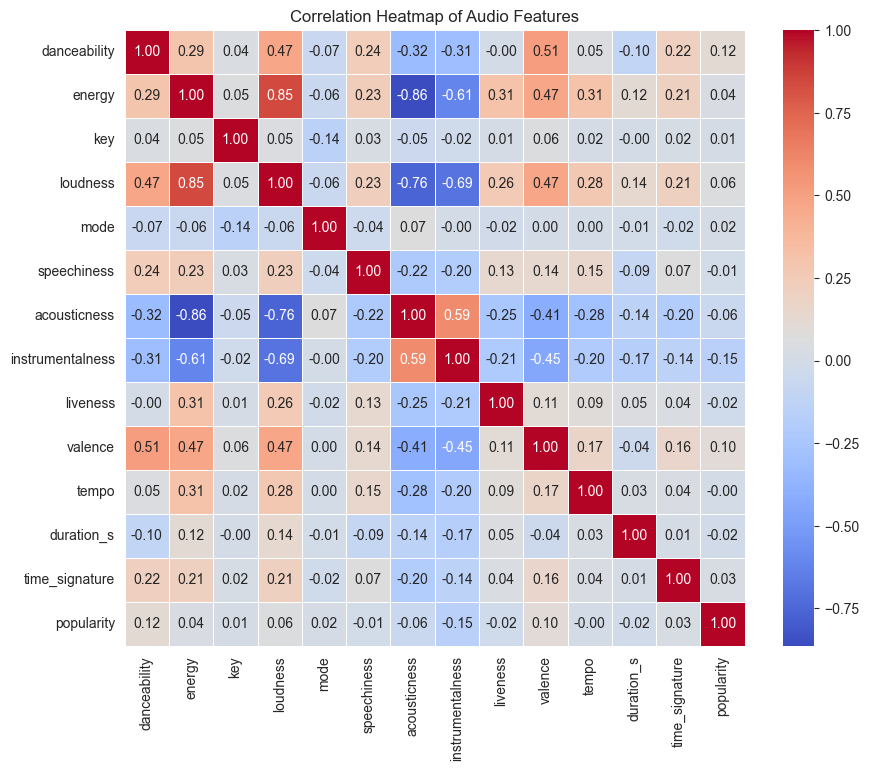

In [6]:
corr_matrix = track_df.drop(columns=['mood']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

In [7]:
X = track_df.drop(columns=['mood'])
y = track_df['mood']

F_values, P_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': F_values, 'P-Value': P_values})

anova_results.sort_values(by='P-Value', ascending=False)

,Feature,F-Value,P-Value
4,mode,3.969979,3.194793e-03
2,key,5.833179,1.094622e-04
12,time_signature,103.751125,2.455567e-87
13,popularity,162.107695,3.883775e-136
11,duration_s,187.402089,4.345687e-157
8,liveness,226.653607,2.354471e-189
10,tempo,259.094419,8.506735e-216
5,speechiness,263.599321,1.879032e-219
0,danceability,514.716322,0.000000e+00
1,energy,3962.036921,0.000000e+00


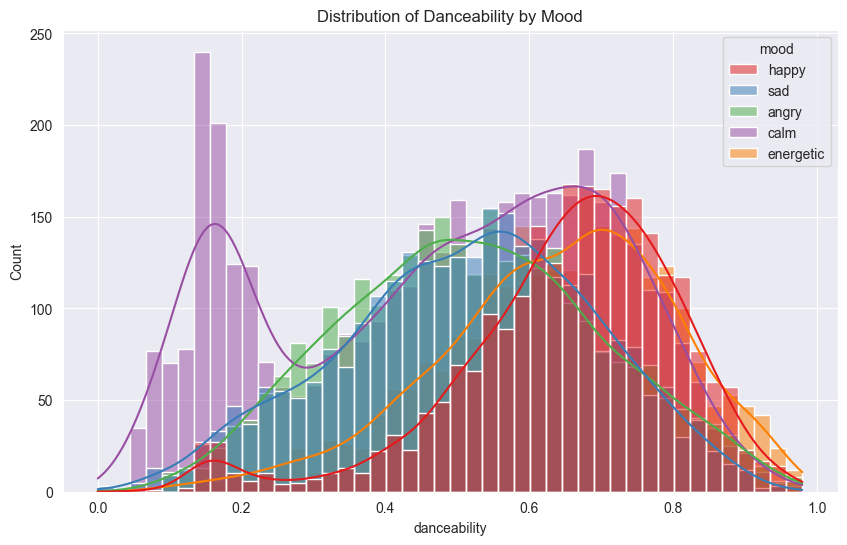

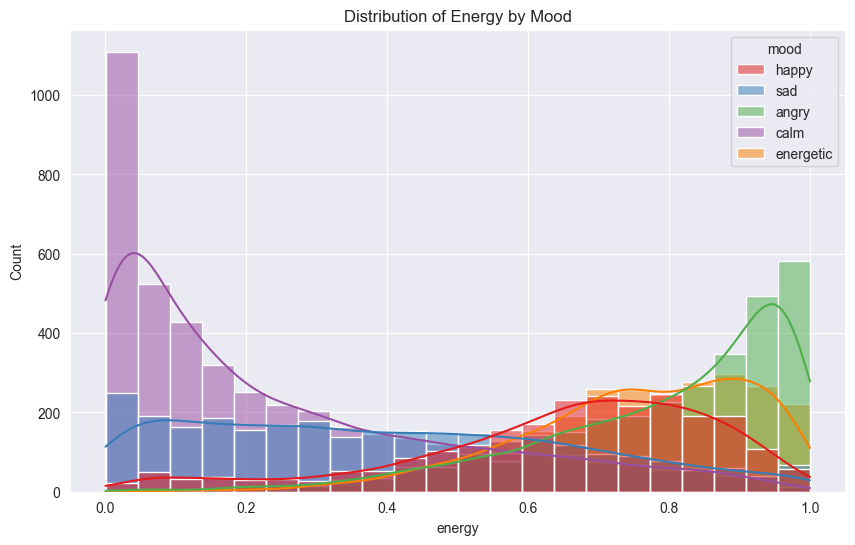

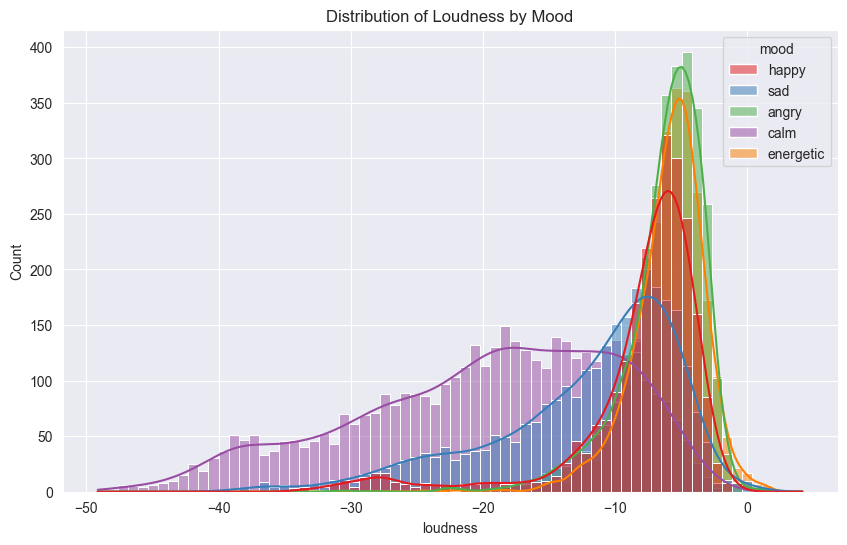

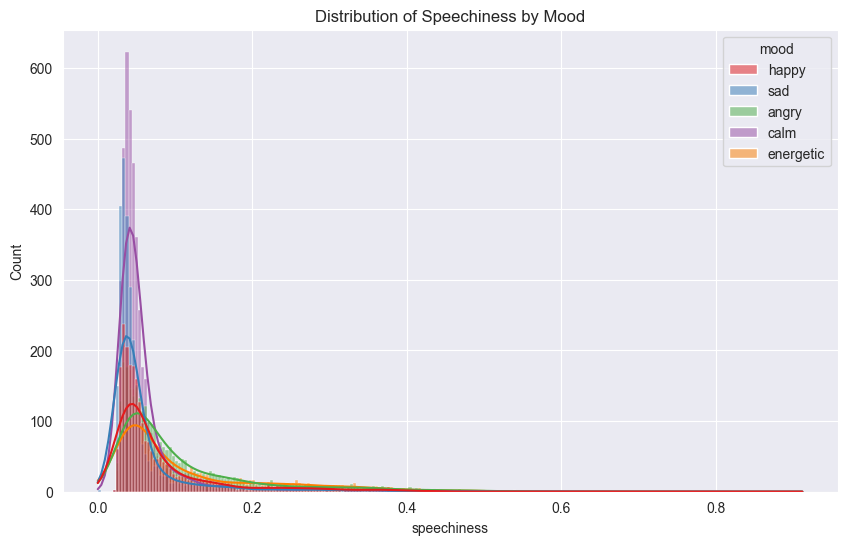

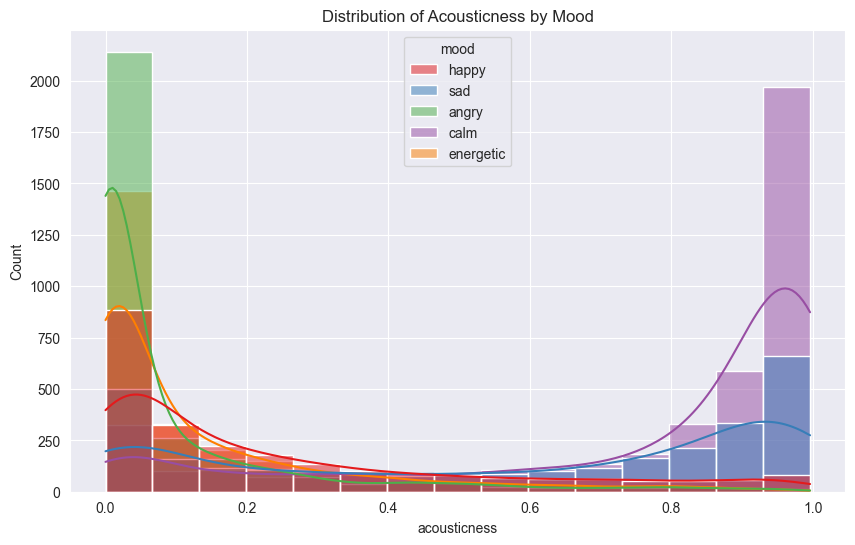

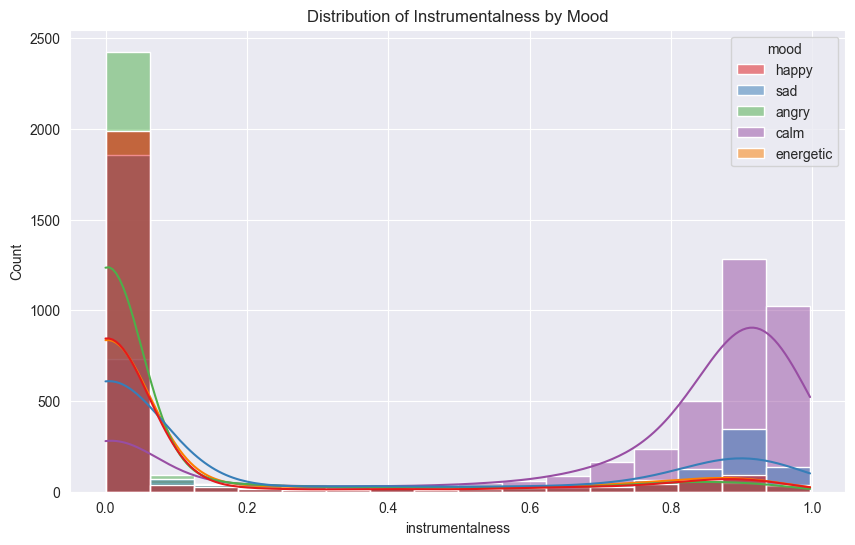

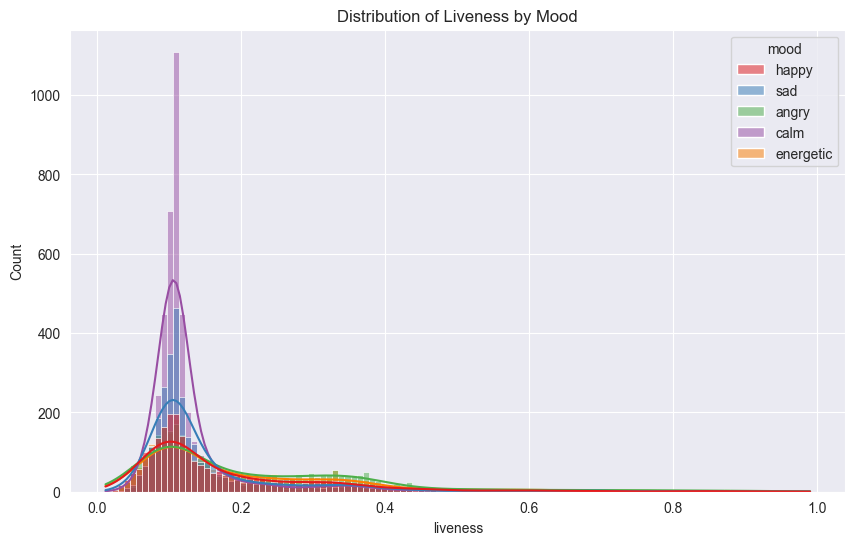

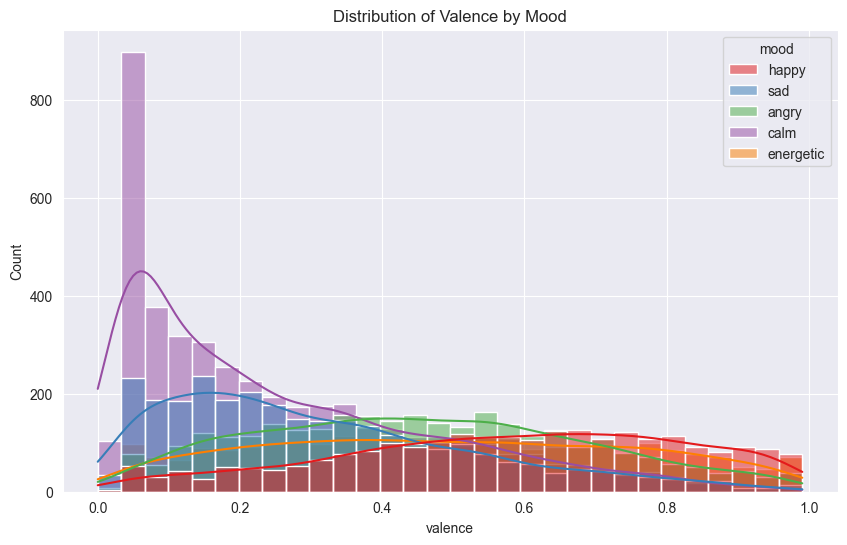

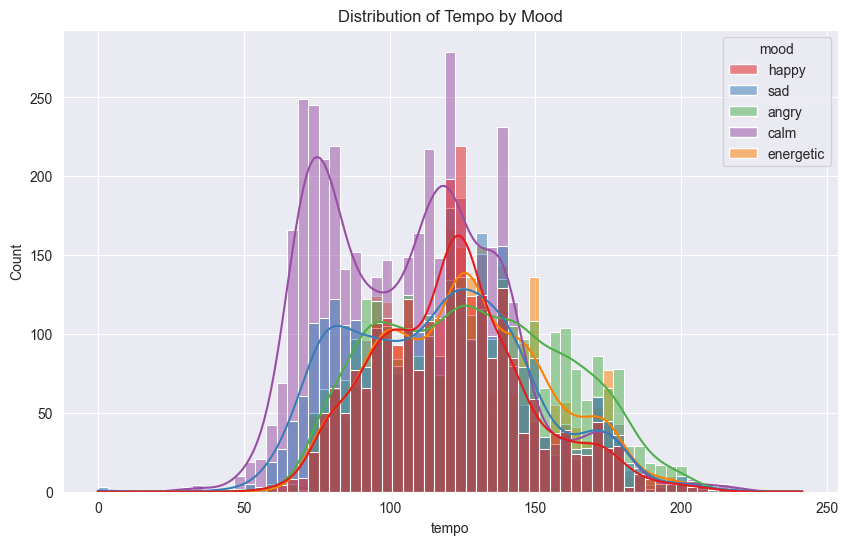

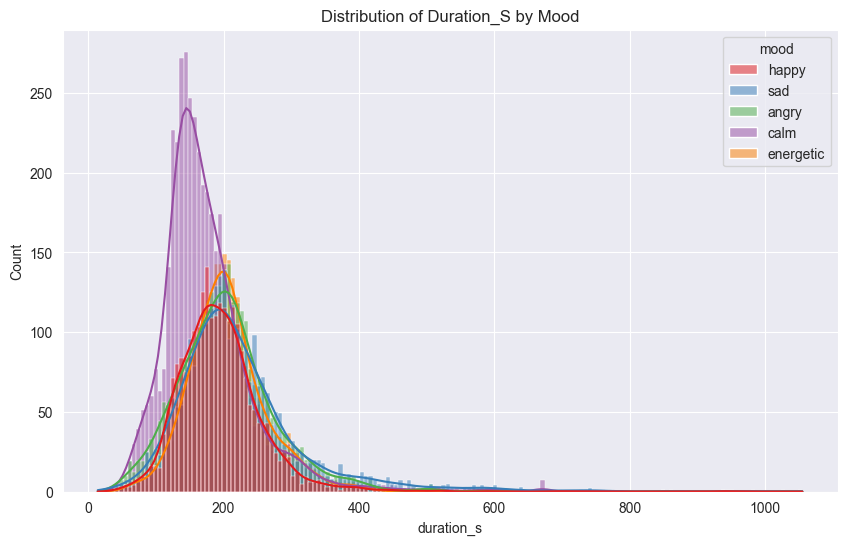

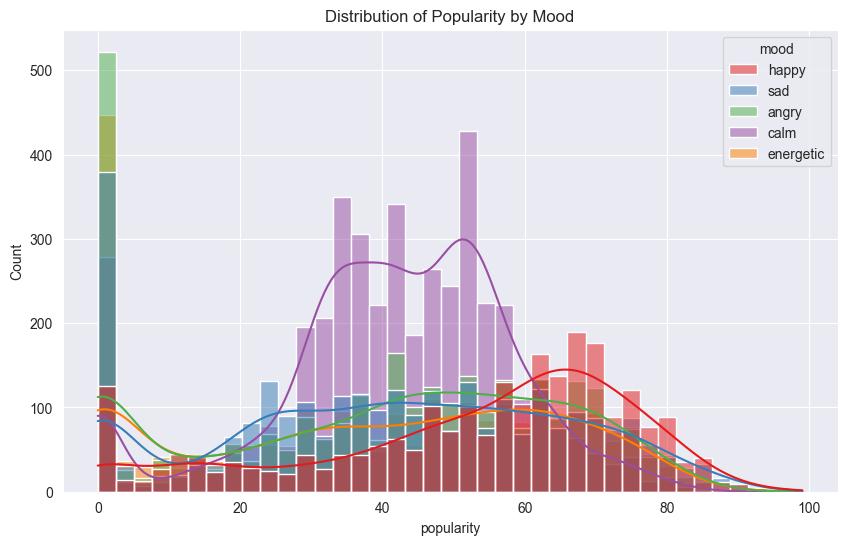

In [8]:
def create_visualization(df, vis_type, **kwargs):
    audio_features = df.drop(columns=['mood', 'key', 'time_signature', 'mode']).columns
    
    for feature in audio_features:
        plt.figure(figsize=(10, 6))
        vis_type(data=df, x=feature, **kwargs)
        
        plt.title(f'Distribution of {feature.title()} by Mood')
        plt.xlabel(f'{feature}')
        
        if vis_type == sns.histplot:
            plt.ylabel('Count')
        else:
            plt.ylabel('Value')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
        
        plt.show()

create_visualization(track_df, sns.histplot, hue='mood', palette='Set1', kde=True)

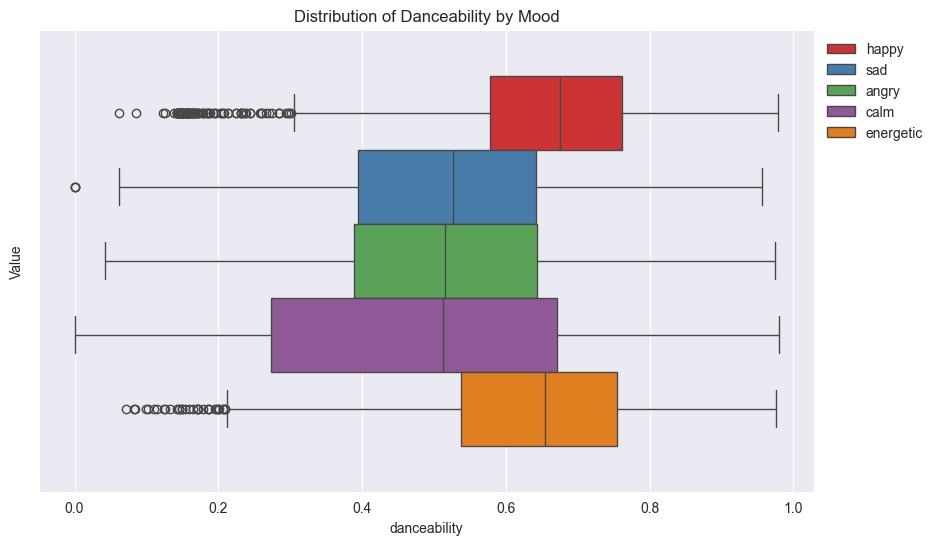

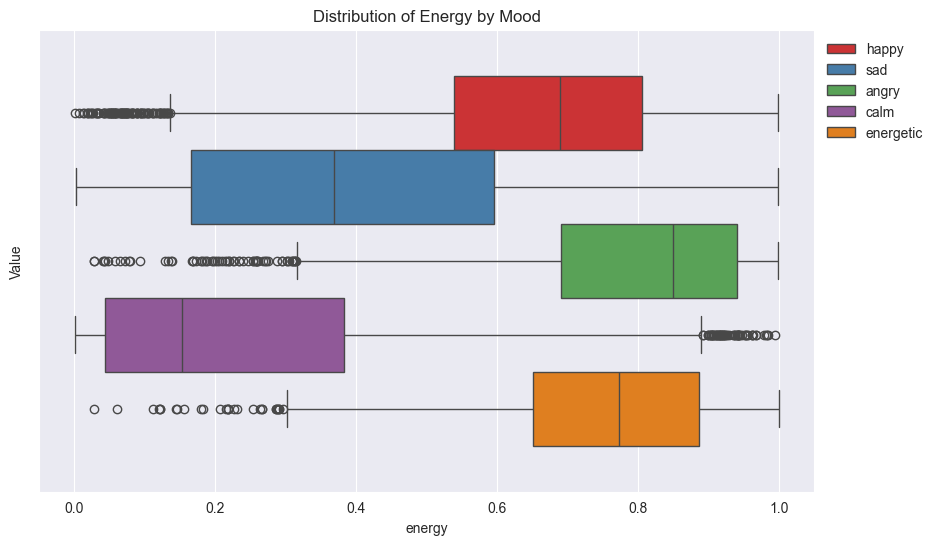

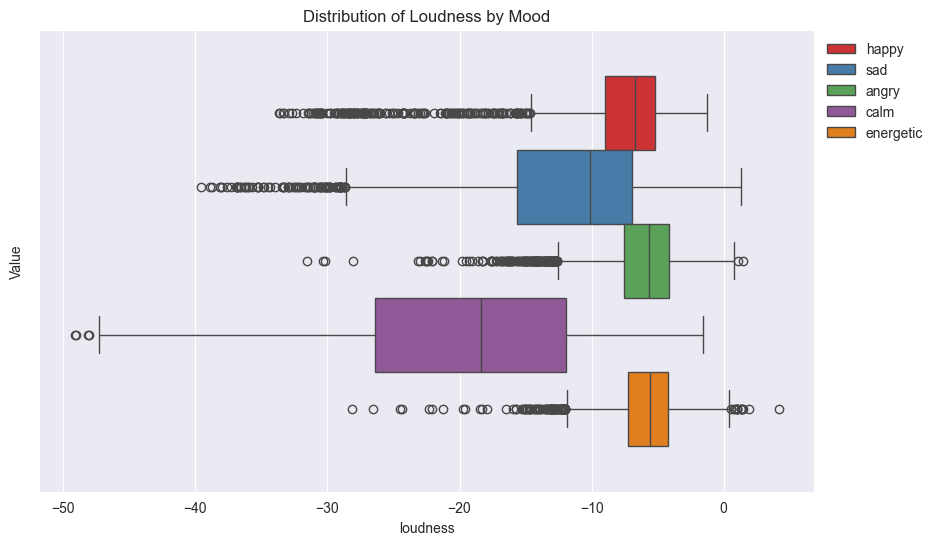

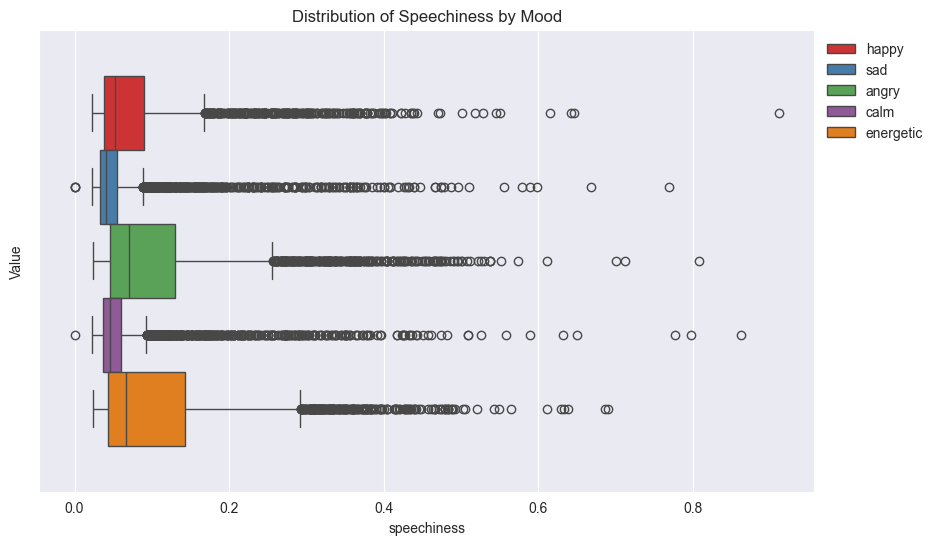

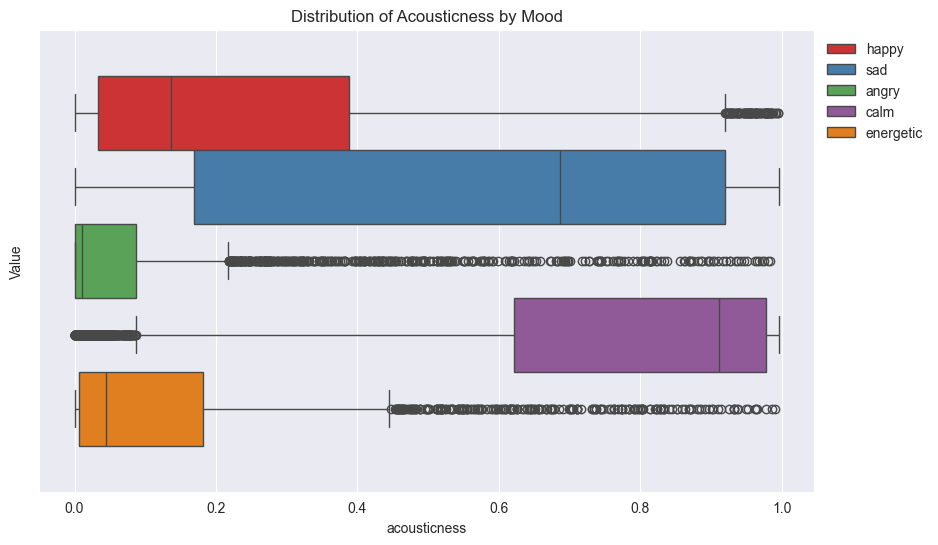

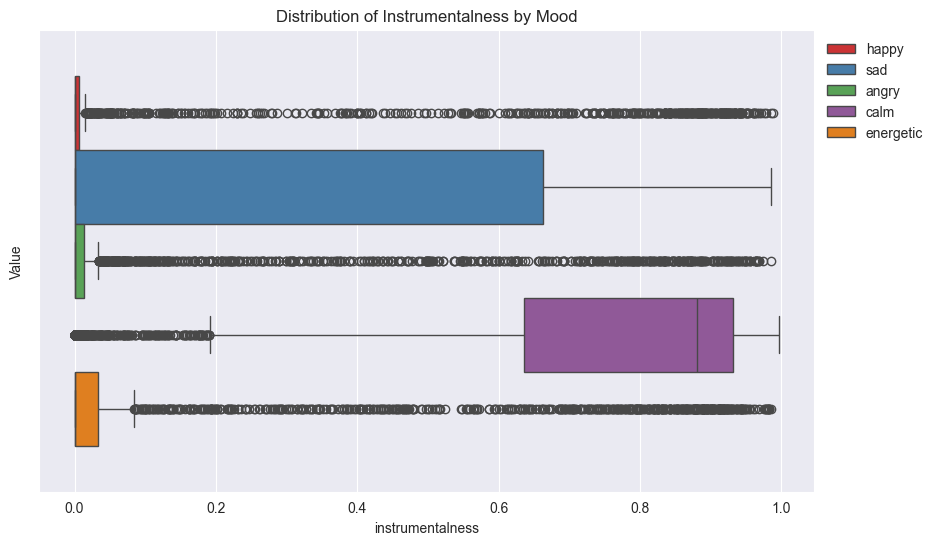

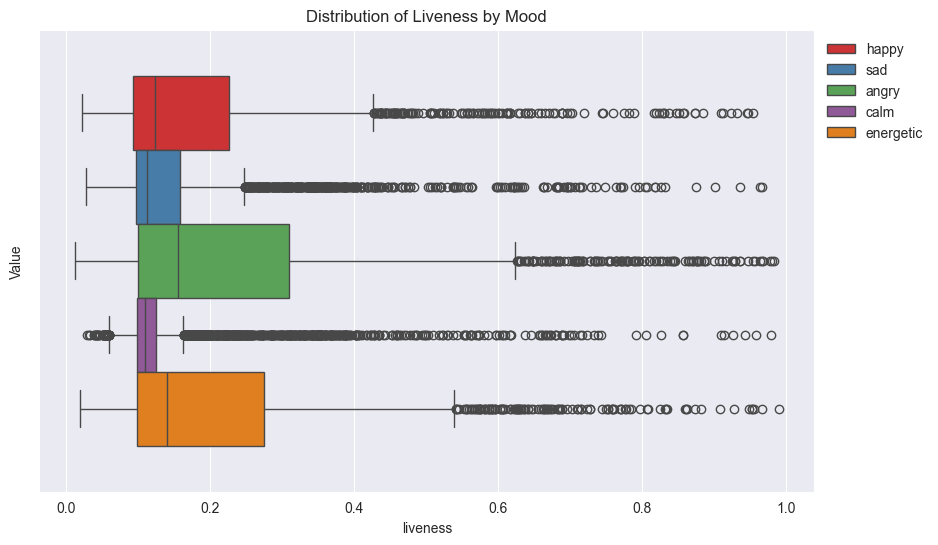

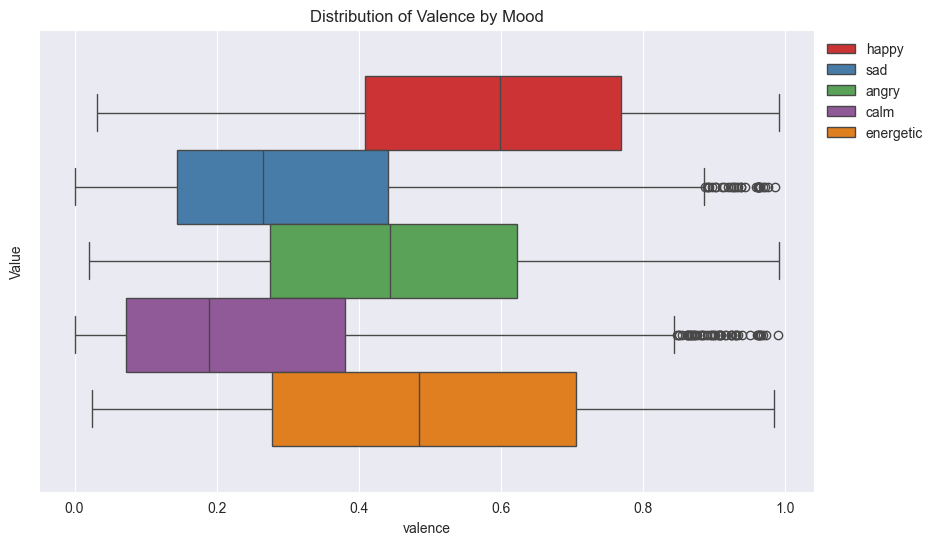

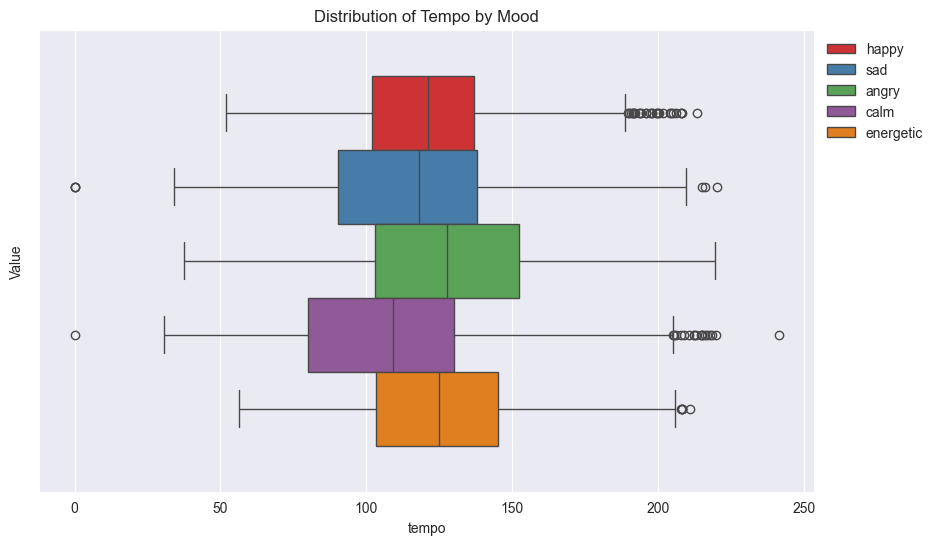

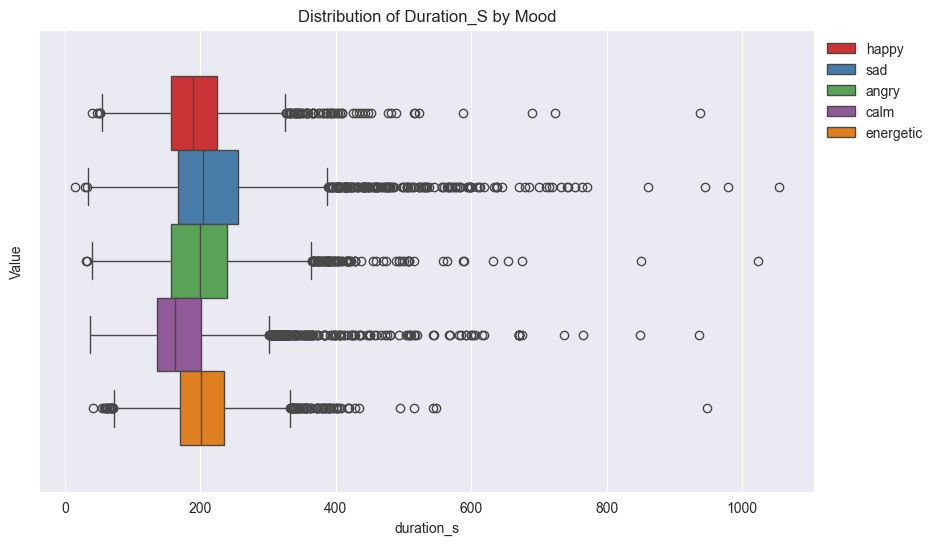

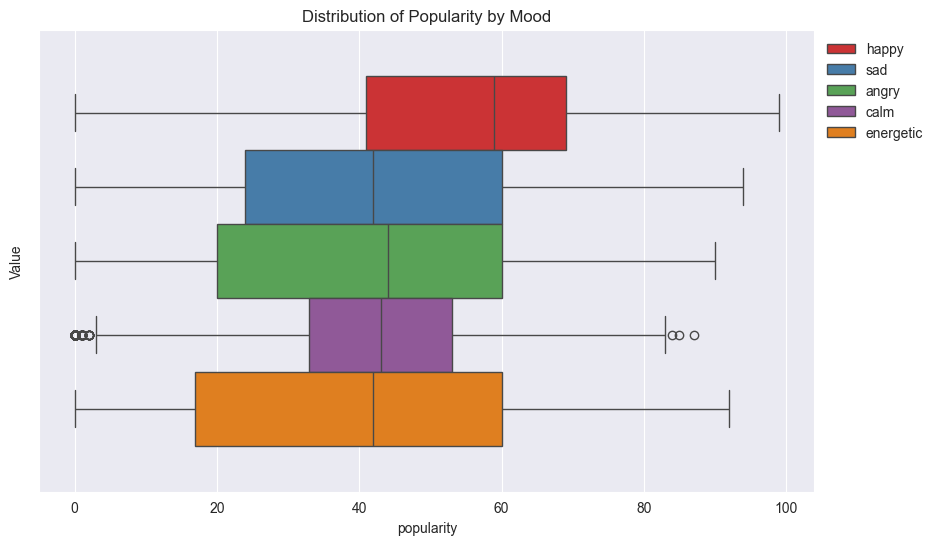

In [9]:
create_visualization(track_df, sns.boxplot, hue='mood', palette='Set1')

In [13]:
track_df.to_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/cleaned_tracks2.csv')